In [1]:
import imageio
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
##Path for Training data
path = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Train Data set/Train/Train/"
##Path for Validation data
path2 = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Train Data set/Test/Test/"

In [4]:
genders = ['Male', 'Female']
frmt = "png"

In [5]:
def imgtodataset(path, genders, frmt):
    data_l = []
    label_l = []
    
    for i in range(len(genders)):
        for im_path in glob.glob(path + genders[i] + "/*." + frmt):
            im = imageio.imread(im_path)
            arr = np.array(im)
            data_l.append(arr)
            label_l.append(i)

    data = np.array(data_l)
    label = np.array(label_l)        
    
    return data, label

In [6]:
data, label = imgtodataset(path, genders, frmt)

In [7]:
val_data, val_label = imgtodataset(path2, genders, frmt)

In [8]:
#Preprocessing data

In [9]:
data_pp = tf.keras.applications.vgg16.preprocess_input(
        data, data_format=None
    )

In [10]:
val_data_pp =  tf.keras.applications.vgg16.preprocess_input(
        val_data, data_format=None
    )

In [11]:
base_vgg_model = tf.keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(100,100,3), pooling=max, classes=2)

In [12]:
base_vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [13]:
base_vgg_model.trainable = False

In [14]:
inputs = keras.Input(shape=(100, 100, 3))

In [15]:
x = base_vgg_model(inputs, training=False)

In [16]:
x = keras.layers.Flatten()(x)

In [17]:
## Defining the number of epochs
epochs_range = 20

In [18]:
##Building competing models

In [19]:
x_1 = keras.layers.Dense(64, activation='relu')(x)
outputs_1 = keras.layers.Dense(1, activation='sigmoid')(x_1)
model_1_1 = keras.Model(inputs, outputs_1)

In [26]:
model_1_1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
                    keras.metrics.FalseNegatives()])

In [27]:
history_1_1 = model_1_1.fit(data_pp, label, epochs=epochs_range, validation_data=(val_data_pp, val_label))

Epoch 1/8
348/348 [==============================] - 341s 976ms/step - loss: 3.2038 - binary_accuracy: 0.8392 - accuracy: 0.3535 - auc_3: 0.8625 - precision_3: 0.8272 - recall_3: 0.8296 - true_positives_3: 4323.0000 - true_negatives_3: 5021.0000 - false_positives_3: 903.0000 - false_negatives_3: 888.0000 - val_loss: 1.6635 - val_binary_accuracy: 0.8577 - val_accuracy: 0.1493 - val_auc_3: 0.8782 - val_precision_3: 0.9211 - val_recall_3: 0.6972 - val_true_positives_3: 350.0000 - val_true_negatives_3: 747.0000 - val_false_positives_3: 30.0000 - val_false_negatives_3: 152.0000
Epoch 2/8
348/348 [==============================] - 352s 1s/step - loss: 0.5370 - binary_accuracy: 0.8965 - accuracy: 0.1422 - auc_3: 0.9442 - precision_3: 0.8919 - recall_3: 0.8862 - true_positives_3: 4618.0000 - true_negatives_3: 5364.0000 - false_positives_3: 560.0000 - false_negatives_3: 593.0000 - val_loss: 0.5334 - val_binary_accuracy: 0.8749 - val_accuracy: 0.0211 - val_auc_3: 0.9299 - val_precision_3: 0.8685

In [28]:
model_1_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                294976    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 15,009,729
Trainable params: 295,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
history_1_1.history

{'loss': [3.203836679458618,
  0.5370157361030579,
  0.20629501342773438,
  0.16684956848621368,
  0.15673168003559113,
  0.15735876560211182,
  0.15376827120780945,
  0.16359087824821472],
 'binary_accuracy': [0.8391557931900024,
  0.8964526057243347,
  0.9254602789878845,
  0.9355186223983765,
  0.9397395849227905,
  0.9404579997062683,
  0.9408172369003296,
  0.9397395849227905],
 'accuracy': [0.3534800112247467,
  0.14216434955596924,
  0.015087561681866646,
  0.005837449338287115,
  0.007274359930306673,
  0.008172429166734219,
  0.011405478231608868,
  0.00951953325420618],
 'auc_3': [0.8625208735466003,
  0.9442067742347717,
  0.9757828712463379,
  0.9824899435043335,
  0.9844189882278442,
  0.9844139218330383,
  0.9853391051292419,
  0.9832614660263062],
 'precision_3': [0.8272101283073425,
  0.8918501138687134,
  0.9239404201507568,
  0.9366375207901001,
  0.9399224519729614,
  0.9412106871604919,
  0.9398917555809021,
  0.9385625720024109],
 'recall_3': [0.8295912742614746,
 

In [30]:
# list all data in history
print(history_1_1.history.keys())

dict_keys(['loss', 'binary_accuracy', 'accuracy', 'auc_3', 'precision_3', 'recall_3', 'true_positives_3', 'true_negatives_3', 'false_positives_3', 'false_negatives_3', 'val_loss', 'val_binary_accuracy', 'val_accuracy', 'val_auc_3', 'val_precision_3', 'val_recall_3', 'val_true_positives_3', 'val_true_negatives_3', 'val_false_positives_3', 'val_false_negatives_3'])


Text(0.5, 1.0, 'Training and Validation Loss for Model 1.1')

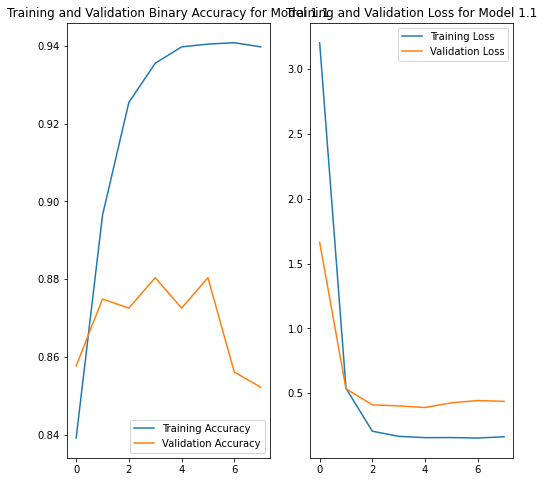

In [36]:
# summarize history for accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history_1_1.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history_1_1.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Binary Accuracy for Model')

plt.subplot(1, 2, 2)
plt.plot(history_1_1.history['loss'], label='Training Loss')
plt.plot(history_1_1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for Model')

Text(0.5, 1.0, 'Training and Validation AUC')

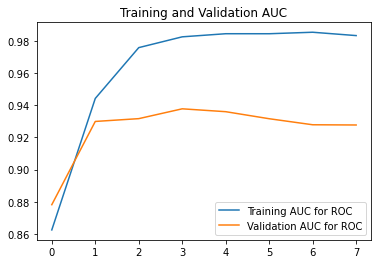

In [38]:
plt.plot(history_1_1.history['auc_3'], label='Training AUC for ROC')
plt.plot(history_1_1.history['val_auc_3'], label='Validation AUC for ROC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')

In [25]:
def getresultssummary(mod_history, mod_num):
    # summarize history for accuracy
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(mod_history.history['binary_accuracy'], label='Training Accuracy')
    plt.plot(mod_history.history['val_binary_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Binary Accuracy for Model '+mod_num)

    plt.subplot(1, 2, 2)
    plt.plot(mod_history.history['loss'], label='Training Loss')
    plt.plot(mod_history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss for Model '+ mod_num)

In [20]:
model_1_2 = keras.Model(inputs, outputs_1)
model_1_2.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
                    keras.metrics.FalseNegatives()])

In [21]:
history_1_2 = model_1_2.fit(data_pp, label, epochs=epochs_range, validation_data=(val_data_pp, val_label))

Epoch 1/20
348/348 [==============================] - 307s 877ms/step - loss: 0.5816 - binary_accuracy: 0.8663 - accuracy: 0.0017 - auc: 0.9319 - precision: 0.8628 - recall: 0.8494 - true_positives: 4426.0000 - true_negatives: 5220.0000 - false_positives: 704.0000 - false_negatives: 785.0000 - val_loss: 0.2748 - val_binary_accuracy: 0.8882 - val_accuracy: 0.0000e+00 - val_auc: 0.9502 - val_precision: 0.8811 - val_recall: 0.8267 - val_true_positives: 415.0000 - val_true_negatives: 721.0000 - val_false_positives: 56.0000 - val_false_negatives: 87.0000
Epoch 2/20
348/348 [==============================] - 328s 943ms/step - loss: 0.2628 - binary_accuracy: 0.8918 - accuracy: 0.0000e+00 - auc: 0.9575 - precision: 0.8946 - recall: 0.8714 - true_positives: 4541.0000 - true_negatives: 5389.0000 - false_positives: 535.0000 - false_negatives: 670.0000 - val_loss: 0.2906 - val_binary_accuracy: 0.8944 - val_accuracy: 0.0000e+00 - val_auc: 0.9552 - val_precision: 0.9180 - val_recall: 0.8028 - val_tr

Epoch 16/20
348/348 [==============================] - 342s 982ms/step - loss: 0.0625 - binary_accuracy: 0.9758 - accuracy: 0.0977 - auc: 0.9973 - precision: 0.9791 - recall: 0.9689 - true_positives: 5049.0000 - true_negatives: 5816.0000 - false_positives: 108.0000 - false_negatives: 162.0000 - val_loss: 0.5654 - val_binary_accuracy: 0.8921 - val_accuracy: 0.0618 - val_auc: 0.9328 - val_precision: 0.8939 - val_recall: 0.8227 - val_true_positives: 413.0000 - val_true_negatives: 728.0000 - val_false_positives: 49.0000 - val_false_negatives: 89.0000
Epoch 17/20
348/348 [==============================] - 338s 972ms/step - loss: 0.0694 - binary_accuracy: 0.9740 - accuracy: 0.1037 - auc: 0.9964 - precision: 0.9762 - recall: 0.9680 - true_positives: 5044.0000 - true_negatives: 5801.0000 - false_positives: 123.0000 - false_negatives: 167.0000 - val_loss: 0.5367 - val_binary_accuracy: 0.8804 - val_accuracy: 0.0649 - val_auc: 0.9297 - val_precision: 0.8721 - val_recall: 0.8147 - val_true_positiv

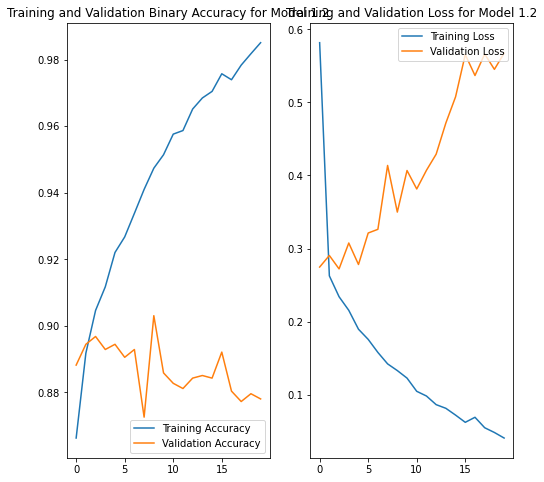

In [26]:
getresultssummary(history_1_2, '1.2')

In [27]:
x_2 = keras.layers.Dense(256, activation= 'relu')(x)
x_2 = keras.layers.Dense(128, activation= 'relu')(x_2)
outputs_2 = keras.layers.Dense(1, activation='sigmoid')(x_2)
model_2 = keras.Model(inputs, outputs_2)

In [28]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 15,927,617
Trainable params: 1,212,929
Non-trainable params: 14,714,688
_______________________________________

In [29]:
model_2.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
                    keras.metrics.FalseNegatives()])

In [30]:
history_2 = model_2.fit(data_pp, label, epochs=epochs_range, validation_data=(val_data_pp, val_label))

Epoch 1/20
348/348 [==============================] - 327s 936ms/step - loss: 0.5028 - binary_accuracy: 0.8514 - accuracy: 0.0163 - auc_1: 0.9173 - precision_1: 0.8469 - recall_1: 0.8330 - true_positives_1: 4341.0000 - true_negatives_1: 5139.0000 - false_positives_1: 785.0000 - false_negatives_1: 870.0000 - val_loss: 0.3074 - val_binary_accuracy: 0.8827 - val_accuracy: 0.0031 - val_auc_1: 0.9449 - val_precision_1: 0.8929 - val_recall_1: 0.7968 - val_true_positives_1: 400.0000 - val_true_negatives_1: 729.0000 - val_false_positives_1: 48.0000 - val_false_negatives_1: 102.0000
Epoch 2/20
348/348 [==============================] - 329s 946ms/step - loss: 0.2426 - binary_accuracy: 0.9058 - accuracy: 0.0074 - auc_1: 0.9667 - precision_1: 0.9074 - recall_1: 0.8895 - true_positives_1: 4635.0000 - true_negatives_1: 5451.0000 - false_positives_1: 473.0000 - false_negatives_1: 576.0000 - val_loss: 0.3647 - val_binary_accuracy: 0.8812 - val_accuracy: 0.0078 - val_auc_1: 0.9397 - val_precision_1: 0

348/348 [==============================] - 330s 950ms/step - loss: 0.0415 - binary_accuracy: 0.9899 - accuracy: 0.1771 - auc_1: 0.9977 - precision_1: 0.9900 - recall_1: 0.9885 - true_positives_1: 5151.0000 - true_negatives_1: 5872.0000 - false_positives_1: 52.0000 - false_negatives_1: 60.0000 - val_loss: 0.6456 - val_binary_accuracy: 0.8913 - val_accuracy: 0.1048 - val_auc_1: 0.9327 - val_precision_1: 0.8652 - val_recall_1: 0.8566 - val_true_positives_1: 430.0000 - val_true_negatives_1: 710.0000 - val_false_positives_1: 67.0000 - val_false_negatives_1: 72.0000
Epoch 16/20
348/348 [==============================] - 339s 976ms/step - loss: 0.0262 - binary_accuracy: 0.9926 - accuracy: 0.1980 - auc_1: 0.9989 - precision_1: 0.9935 - recall_1: 0.9908 - true_positives_1: 5163.0000 - true_negatives_1: 5890.0000 - false_positives_1: 34.0000 - false_negatives_1: 48.0000 - val_loss: 0.7550 - val_binary_accuracy: 0.8890 - val_accuracy: 0.1822 - val_auc_1: 0.9288 - val_precision_1: 0.8309 - val_rec

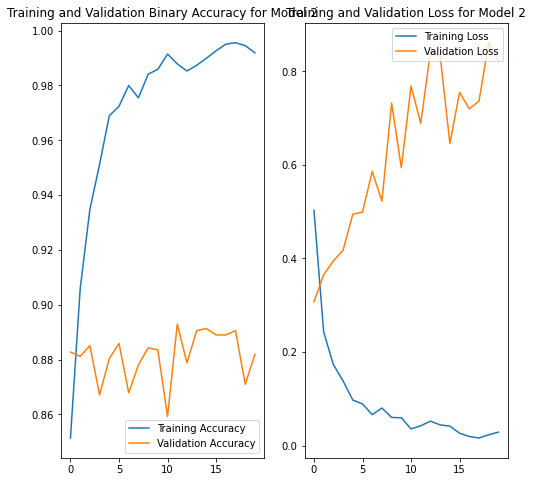

In [31]:
getresultssummary(history_2, '2')

In [32]:
x_3 =  keras.layers.Dense(256, activation='relu')(x)
x_3 =  keras.layers.Dense(128, activation='relu')(x_3)
x_3 =  keras.layers.Dense(64, activation='relu')(x_3)
x_3 =  keras.layers.Dense(32, activation='relu')(x_3)
x_3 =  keras.layers.Dense(16, activation='relu')(x_3)
outputs_3 = keras.layers.Dense(1, activation='sigmoid')(x_3)
model_3_1 = keras.Model(inputs, outputs_3)
model_3_2 = keras.Model(inputs, outputs_3)

In [33]:
model_3_1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
                    keras.metrics.FalseNegatives()])

In [34]:
history_3_1 = model_3_1.fit(data_pp, label, epochs=epochs_range, validation_data=(val_data_pp, val_label))

Epoch 1/20
348/348 [==============================] - 314s 898ms/step - loss: 0.3243 - binary_accuracy: 0.8646 - accuracy: 1.7961e-04 - auc_2: 0.9367 - precision_2: 0.8628 - recall_2: 0.8449 - true_positives_2: 4403.0000 - true_negatives_2: 5224.0000 - false_positives_2: 700.0000 - false_negatives_2: 808.0000 - val_loss: 0.2575 - val_binary_accuracy: 0.8913 - val_accuracy: 0.0000e+00 - val_auc_2: 0.9559 - val_precision_2: 0.8682 - val_recall_2: 0.8526 - val_true_positives_2: 428.0000 - val_true_negatives_2: 712.0000 - val_false_positives_2: 65.0000 - val_false_negatives_2: 74.0000
Epoch 2/20
348/348 [==============================] - 334s 961ms/step - loss: 0.2219 - binary_accuracy: 0.9093 - accuracy: 8.9807e-05 - auc_2: 0.9697 - precision_2: 0.9083 - recall_2: 0.8968 - true_positives_2: 4673.0000 - true_negatives_2: 5452.0000 - false_positives_2: 472.0000 - false_negatives_2: 538.0000 - val_loss: 0.2932 - val_binary_accuracy: 0.8952 - val_accuracy: 0.0000e+00 - val_auc_2: 0.9481 - val

348/348 [==============================] - 336s 965ms/step - loss: 0.0292 - binary_accuracy: 0.9913 - accuracy: 0.1076 - auc_2: 0.9987 - precision_2: 0.9910 - recall_2: 0.9904 - true_positives_2: 5161.0000 - true_negatives_2: 5877.0000 - false_positives_2: 47.0000 - false_negatives_2: 50.0000 - val_loss: 0.7411 - val_binary_accuracy: 0.8788 - val_accuracy: 0.0305 - val_auc_2: 0.9187 - val_precision_2: 0.8881 - val_recall_2: 0.7908 - val_true_positives_2: 397.0000 - val_true_negatives_2: 727.0000 - val_false_positives_2: 50.0000 - val_false_negatives_2: 105.0000
Epoch 16/20
348/348 [==============================] - 333s 957ms/step - loss: 0.0205 - binary_accuracy: 0.9927 - accuracy: 0.1673 - auc_2: 0.9994 - precision_2: 0.9940 - recall_2: 0.9904 - true_positives_2: 5161.0000 - true_negatives_2: 5893.0000 - false_positives_2: 31.0000 - false_negatives_2: 50.0000 - val_loss: 0.6898 - val_binary_accuracy: 0.8905 - val_accuracy: 0.1087 - val_auc_2: 0.9248 - val_precision_2: 0.8664 - val_re

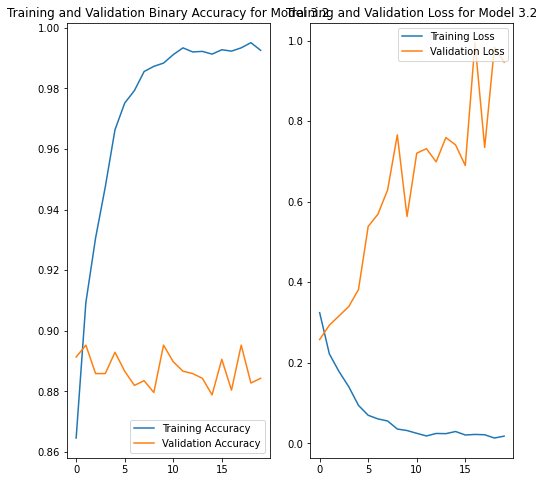

In [35]:
getresultssummary(history_3_1, '3.1')

In [ ]:
model_3_1.save('model_3_1.h5')

In [ ]:
model_3_2.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
                    keras.metrics.FalseNegatives()])

In [ ]:
history_3_2 = model_3_2.fit(data_pp, label, epochs=epochs_range, validation_data=(val_data_pp, val_label))

In [ ]:
getresultssummary(history_3_2, '3.2')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c67a883-3918-439e-a462-2827f4672e07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>